<a href="https://colab.research.google.com/github/kingsuching/Frost2021Package/blob/main/DATA_301_Lab_1B_Phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

In [1]:
# TYPE YOUR CODE HERE.
from google.colab import files
import pandas as pd
responses = files.upload()
responses = pd.read_csv("response.csv")

Saving response.csv to response.csv


Text(0, 0.5, 'Number of Responses')

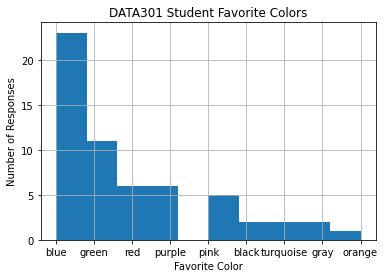

In [2]:
import matplotlib.pyplot as plt
responses['What is your favorite color?']=responses['What is your favorite color?'].str.lower()
responses['What is your favorite color?']=responses['What is your favorite color?'].replace({'blue/indigo':'blue',
                        'dark green':'green',
                        'navy ':'blue',
                        'magenta':'pink',
                        'royal blue':'blue',
                        'grey':'gray',
                        'light pink':'pink',
                        'light blue':'blue',
                        'blue and black':'blue',
                        'orange and blue':'orange',
                        'teal':'turquoise',
                        'forest green':'green',
                        'navy blue':'blue'
                        })

responses['What is your favorite color?'].value_counts
responses['What is your favorite color?'].hist()
plt.title('DATA301 Student Favorite Colors')
plt.xlabel('Favorite Color')
plt.ylabel('Number of Responses')

**TYPE YOUR WRITTEN EXPLANATION HERE.**

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

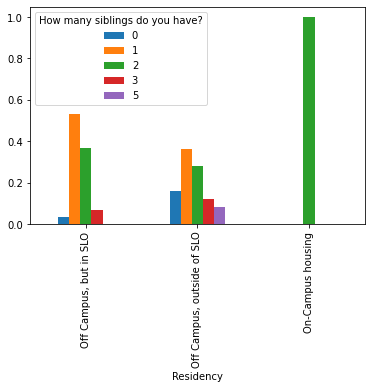

In [3]:
# TYPE YOUR CODE HERE.
import seaborn as sns
responses.rename(columns={"Where are you living this quarter?": "Residency"}, inplace=True)
ct = pd.crosstab(responses["How many siblings do you have?"], responses["Residency"], normalize=True).divide(responses["Residency"].value_counts(normalize=True))
ct.T.plot.bar()

In [ ]:
responses.groupby("Residency")["How many siblings do you have?"].mean()

Residency
Off Campus, but in SLO        1.466667
Off Campus, outside of SLO    1.680000
On-Campus housing             2.000000
Name: How many siblings do you have?, dtype: float64

**TYPE YOUR WRITTEN EXPLANATION HERE.**

More students who lived off-campus in SLO tended to report that they have fewer siblings. However, some students who lived outside of SLO reported that they more siblings than the in-SLO students. The place that had the highest average number of siblings is on-campus, primarily because there were very few observations and almost all of them were a high number of siblings.

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

(<seaborn.axisgrid.FacetGrid at 0x7f33fe79d610>, Residency
 Off Campus, but in SLO       -0.066428
 Off Campus, outside of SLO   -0.075430
 On-Campus housing            -0.239731
 Name: accuracy, dtype: float64)

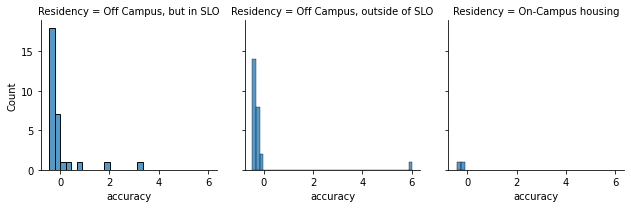

In [4]:
# TYPE YOUR CODE HERE.
import numpy as np
responses.rename(columns={"Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?": "golfBalls"}, inplace=True)
responses["accuracy"] = responses["golfBalls"].astype(float).map(lambda n: (n-1179360) / np.std(responses["golfBalls"]))
sns.FacetGrid(data=responses, col = "Residency").map(sns.histplot, "accuracy"), responses.groupby("Residency")["accuracy"].mean()


**TYPE YOUR WRITTEN EXPLANATION HERE.**

The off-campus SLO students tended to perform the most accurately in the golf ball questions because theyre were more observations that were closer to zero. This, in turn, brought the mean for that group closer to zero.

## Question 4

Write and answer your own question using this data set.

**Do the number of siblings that a student possesses an influence on how accurately the student does on the golf ball question? Does it also vary by major?**

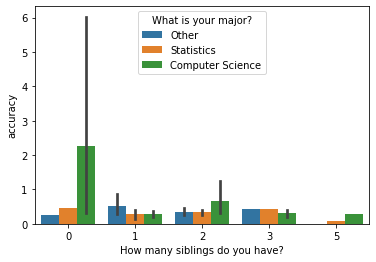

In [ ]:
# TYPE YOUR CODE HERE.
import seaborn as sns
responses["accuracy"] = responses["accuracy"].map(lambda x: abs(x))
df = responses.groupby(["How many siblings do you have?", "What is your major?"])["accuracy"].mean()
sns.barplot(x=responses["How many siblings do you have?"], y = responses["accuracy"], hue = responses["What is your major?"])

Computer science majors tended to perform the best given that they had no siblings. In addition, other majors perfomed consistently on the golf-ball question regardless of the number of siblings. Lastly, the stats majors with high numbers of siblings performed the best in the golf ball question. This shows that there is a relationship between the golf ball question performance and major/number of siblings.